In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tqdm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\Admin\Documents\AI\Abdur Rehman'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\Admin\Documents\AI\Abdur Rehman\sample_submission.csv
C:\Users\Admin\Documents\AI\Abdur Rehman\test.csv
C:\Users\Admin\Documents\AI\Abdur Rehman\train.csv
C:\Users\Admin\Documents\AI\Abdur Rehman\Untitled.ipynb
C:\Users\Admin\Documents\AI\Abdur Rehman\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [9]:
train = pd.read_csv('train.csv', index_col='plaintext_id')
test = pd.read_csv('test.csv', index_col='ciphertext_id')
sub = pd.read_csv('sample_submission.csv', index_col='ciphertext_id')

In [11]:
train['length'] = train.text.apply(len)
test['length'] = test.ciphertext.apply(len)

<Axes: >

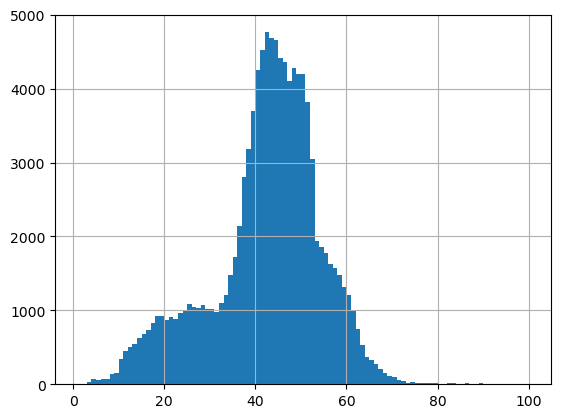

In [13]:
train[train['length']<=100]['length'].hist(bins=99)

In [15]:
train.head()

,text,index,length
plaintext_id,,,
ID_d45641fc3,"come, who you are and what you would are out o...",104199,50
ID_2058482ae,For all in vain comes counsel to his ear.,79081,41
ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43
ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39
ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46


In [17]:
test.head(10)

,ciphertext,difficulty,length
ciphertext_id,,,
ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100
ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764
ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772
ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4,764
ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3,573
ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...",1,100
ID_d22731a2d,"1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: ...",2,100
ID_a1f8defe3,26313 3720 42782 43095 15349 49837 45407 34248...,3,576
ID_df952a0c2,BBBRplwSMcJ1V7umvVSMAqZEziFjYkFjhKLEyIW3tGCwtD...,4,760


In [19]:
KEYLEN = 4 # len('pyle')
def decrypt_level_1(ctext):
    key = [ord(c) - ord('a') for c in 'pyle']
    key_index = 0
    plain = ''
    for c in ctext:
        cpos = 'abcdefghijklmnopqrstuvwxy'.find(c)
        if cpos != -1:
            p = (cpos - key[key_index]) % 25
            pc = 'abcdefghijklmnopqrstuvwxy'[p]
            key_index = (key_index + 1) % KEYLEN
        else:
            cpos = 'ABCDEFGHIJKLMNOPQRSTUVWXY'.find(c)
            if cpos != -1:
                p = (cpos - key[key_index]) % 25
                pc = 'ABCDEFGHIJKLMNOPQRSTUVWXY'[p]
                key_index = (key_index + 1) % KEYLEN
            else:
                pc = c
        plain += pc
    return plain

def encrypt_level_1(ptext, key_index=0):
    key = [ord(c) - ord('a') for c in 'pyle']
    ctext = ''
    for c in ptext:
        pos = 'abcdefghijklmnopqrstuvwxy'.find(c)
        if pos != -1:
            p = (pos + key[key_index]) % 25
            cc = 'abcdefghijklmnopqrstuvwxy'[p]
            key_index = (key_index + 1) % KEYLEN
        else:
            pos = 'ABCDEFGHIJKLMNOPQRSTUVWXY'.find(c)
            if pos != -1:
                p = (pos + key[key_index]) % 25
                cc = 'ABCDEFGHIJKLMNOPQRSTUVWXY'[p]
                key_index = (key_index + 1) % KEYLEN
            else:
                cc = c
        ctext += cc
    return ctext

def test_decrypt_level_1():
    c_id = 'ID_4a6fc1ea9'
    ciphertext = test.loc[c_id]['ciphertext']
    print('Ciphertxt:', ciphertext)
    decrypted = decrypt_level_1(ciphertext)
    print('Decrypted:', decrypted)
    encrypted = encrypt_level_1(decrypted)
    print('Encrypted:', encrypted)
    print("Encrypted == Ciphertext:", encrypted == ciphertext)

test_decrypt_level_1()

Ciphertxt: H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh
Decrypted: R2-u.'VzS$BPHruQl r)4S1jHAMLET: A little month, or ere those shoes were oldau)rWX9I41rWet4pLv!rQ)-Gv
Encrypted: H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh
Encrypted == Ciphertext: True


In [21]:
plain_dict = {}
for p_id, row in train.iterrows():
    text = row['text']
    plain_dict[text] = p_id
print(len(plain_dict))

108755


In [23]:
matched, unmatched = 0, 0
for c_id, row in tqdm.tqdm(test[test['difficulty']==1].iterrows()):
    decrypted = decrypt_level_1(row['ciphertext'])
    found = False
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    if not found:
        unmatched += 1
        print(decrypted)
            
print(f"Matched {matched}   Unmatched {unmatched}")

27158it [00:17, 1587.30it/s]

Matched 27158   Unmatched 0


In [25]:
import math
from itertools import cycle

def rail_pattern(n):
    r = list(range(n))
    return cycle(r + r[-2:0:-1])

def encrypt_level_2(plaintext, rails=21):
    p = rail_pattern(rails)
    # this relies on key being called in order, guaranteed?
    return ''.join(sorted(plaintext, key=lambda i: next(p)))
def decrypt_level_2(ciphertext, rails=21):
    p = rail_pattern(rails)
    indexes = sorted(range(len(ciphertext)), key=lambda i: next(p))
    result = [''] * len(ciphertext)
    for i, c in zip(indexes, ciphertext):
        result[i] = c
    return ''.join(result)

In [27]:
matched, unmatched = 0, 0
for c_id, row in tqdm.tqdm(test[test['difficulty']==2].iterrows()):
    decrypted = decrypt_level_1(decrypt_level_2(row['ciphertext']))
    found = False
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    if not found:
        unmatched += 1
        print(decrypted)
            
print(f"Matched {matched}   Unmatched {unmatched}")
sub.to_csv('submit-level-2.csv')

26849it [00:20, 1315.95it/s]


Matched 26849   Unmatched 0


In [29]:
level12_train_index = list(sub[sub["index"] > 0]["index"])
print(len(level12_train_index))
train34 = train[~train["index"].isin(level12_train_index)].copy()
test3 = test[test['difficulty']==3].copy()
test4 = test[test['difficulty']==4].copy()
print(train34.shape, test3.shape[0] + test4.shape[0])

54007
(54748, 3) 54748


In [31]:
test3.sort_values("length", ascending=False).head(5)

,ciphertext,difficulty,length
ciphertext_id,,,
ID_f0989e1c5,42991 17994 23697 24006 47005 43397 5670 2971 ...,3,4050
ID_56f09bb72,19415 11851 23233 1077 32359 5323 34986 42561 ...,3,2895
ID_6a40e7018,19828 45120 30442 32079 44281 43186 40593 4181...,3,2882
ID_11070f053,6714 43253 18220 25395 16030 9339 5083 42944 4...,3,1732
ID_dfc6280e7,31965 19680 5343 42985 43071 48050 1770 27937 ...,3,1728


In [33]:
test3["nb"] = test3["ciphertext"].apply(lambda x: len(x.split(" ")))
test3.sort_values("length", ascending=False).head(5)

,ciphertext,difficulty,length,nb
ciphertext_id,,,,
ID_f0989e1c5,42991 17994 23697 24006 47005 43397 5670 2971 ...,3,4050,700
ID_56f09bb72,19415 11851 23233 1077 32359 5323 34986 42561 ...,3,2895,500
ID_6a40e7018,19828 45120 30442 32079 44281 43186 40593 4181...,3,2882,500
ID_11070f053,6714 43253 18220 25395 16030 9339 5083 42944 4...,3,1732,300
ID_dfc6280e7,31965 19680 5343 42985 43071 48050 1770 27937 ...,3,1728,300


In [35]:
train34.sort_values("length", ascending=False).head(5)

,text,index,length
plaintext_id,,,
ID_e886373e0,"The vision. Enter, solemnly tripping one after...",42677,842
ID_d702c9c75,"Enter a King and a Queen very lovingly, the Qu...",34509,671
ID_083ddb1e0,"Solemn music. Enter, as in an apparition, SIC...",31644,423
ID_a1b257ad8,"GOWER: Enter, PERICLES and SIMONIDES at one do...",76893,413
ID_321b489d8,"PROSPERO: Re-enter ARIEL before: then ALONSO, ...",93461,278


In [37]:
c_id = 'ID_f0989e1c5' # length = 700
index = 34509 # length = 671
sub.loc[c_id] = index # train.loc[p_id]['index']

In [39]:
test4.sort_values("length", ascending=False).head(5)

,ciphertext,difficulty,length
ciphertext_id,,,
ID_0414884b0,BRdStV0LMMl3QLixuFmFFaxcziBtc0V6j6rTyYiktGCosD...,4,6924
ID_7a60eab03,AxNVv10LMMlyT72xuFKAGqFczylicUZ6ia7Xzoiktmmktj...,4,1552
ID_d55b78ead,ABdVsFQLMMN0Rbmxv1GMGqVcziJvek56iarVyo2ktmGptj...,4,1548
ID_1779dc0ff,ABRUtU0fMcJ2QKmivlaEGrVNxCVjclduj6PSz522vGChtC...,4,1548
ID_ae54421bf,BRFVtl4LMMl2R76xuFCBGqRczSRodEd6jqvSyoikt2SptT...,4,1548


In [41]:
test4.head(1)["ciphertext"].values[0]

'Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT4FkAHmS4YCE8n6IRobTMyu6PnCY919kB/UtA0/gg9qYQtIZxM9z/bKvA213y1/EbefjCdeeKBHgkK7821cwVIqGRGBC8l/ZIOG5cBM1c8fBomvbAFHjady66qNr4YRzD9y+GaCRUXYgboj4ZMgf3K/yM9czB5zXCjJnvu9jSRHzjyvDVYQJTuTMapi6WsOpIOsZMPOEIWCv/vltc/F+dxmU0gogWc0ciYjK7vxhed8wujGMnv0dbCrYJrbI0NxCjOejPyvKjwmdmCrILKbXdCeKY1+Z8WKi1kHsJYyoLsON7jfPZjvh0GYQ/OpC3tj0Qa/ua6uLpXeUlPMYqqk33wdNVtbWsme9l2I8zzsPZz9DMMtQkH/DGVRmkOvxjO337fk4DF+099CCSYnKNTT5t+JcsztC98nS1jLRpCboYY/TJOKJyga1noFi/VSHx8oVbluQivsNLfR+CBWMFSJiFlWfRXb49RN/PkhOpvs0TsWyuAfgoMcnocrg+/muj3N0vszPIECb6Ihe5v3eDSJRMx1JfueYZHU2j4R2fbJcgN2uTeP7OoWvCVfQbrOrLDc7nwtLW9OJYtqpY8I8u2WoGRSp/b3z334QkjjiPTNGflX6DE10oUqY2BaHsJ8Vi97popzxpGPTGjDr2kTvGhgEMgQb5WQSQwiBZOi5q3LTcFFKHz8cMkxk8Uc2IVxyKkuboCynt13Rj0TOeU='

In [43]:
import base64

def encode_base64(x):
    return base64.b64encode(x.encode('ascii')).decode()

def decode_base64(x):
    return base64.b64decode(x)

train34["nb"] = train34["length"].apply(lambda x: math.ceil(x/100)*100)
ratio = test3["length"].mean() / train34["nb"].mean()
print(ratio)

def get_length_level1(x):
    n = len(decode_base64(x))/ratio
    n = round(n / 100) * 100
    return n

train34.head(3)

5.756458161962764


,text,index,length,nb
plaintext_id,,,,
ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39,100
ID_04fabf707,VALERIA: the yarn she spun in Ulysses' absence...,24925,59,100
ID_8b6c19ddc,In a most dear particular. He call'd me father:,27743,47,100


In [45]:
test4["nb"] = test4["ciphertext"].apply(lambda x: get_length_level1(x)) 
test4.sort_values("nb", ascending=False).head(5)

,ciphertext,difficulty,length,nb
ciphertext_id,,,,
ID_0414884b0,BRdStV0LMMl3QLixuFmFFaxcziBtc0V6j6rTyYiktGCosD...,4,6924,900
ID_063578bfb,AhBSv1oLN853QbuxuVeNEqZcyCNjcEF6iarXyI6kvGikuS...,4,1528,200
ID_e9a6a2fce,BxZUt00aPM50V7ins1eHAqZNzyJrYkVsjajd2Y+2vWapoT...,4,1544,200
ID_1779dc0ff,ABRUtU0fMcJ2QKmivlaEGrVNxCVjclduj6PSz522vGChtC...,4,1548,200
ID_703b8de1b,AhZWsFwLNc50Q7uxv1OEEaNczyBoe096j63VwIWktGCnsD...,4,1540,200


In [47]:
c_id = 'ID_0414884b0' # length = 900
index = 42677 # length = 842
sub.loc[c_id] = index # train.loc[p_id]['index']

In [49]:
sub.head(3)

,index
ciphertext_id,
ID_2a3ea0caa,69027
ID_ddbd3b32d,0
ID_fa75bb12c,0


In [51]:
def is_correct_mapping(ct_l2, ct_l3):
    tmp = pd.DataFrame([(c,n) for c,n in zip(list(ct_l2), ct_l3.split(" ")) if c.isalpha()])
    tmp.drop_duplicates(inplace=True)
    tmp.columns = ["ch", "num"]
    tmp = tmp.groupby("num")["ch"].nunique()
    return tmp.shape[0] == tmp.sum()

def pad_str(s, special_char = '?'):
    nb = len(s)
    nb_round = math.ceil(nb / 100) * 100
    nb_left = (nb_round - nb) // 2
    nb_right = nb_round - nb - nb_left
    
    left_s = ''.join([special_char] * nb_left)
    right_s = ''.join([special_char] * nb_right)
    return left_s + s + right_s

def is_correct_mapping_low(pt, ct):
    all_ct_l2 = [encrypt_level_2(encrypt_level_1(pad_str(pt), key_index)) for key_index in range(4)]

    for i, ct_l2 in enumerate(all_ct_l2):
        if is_correct_mapping(ct_l2, ct):
            return i
    return -1

def find_mapping(ciphertext_id, ct, train_df):
    nb = len(ct.split(" "))
    nb_low = ((nb // 100) - 1) * 100
    
    rs = []
    selected_rows = train_df[(train_df["length"] > nb_low) & (train_df["length"] < nb)]
    for row_id, row in selected_rows.iterrows():
        pt = row["text"]
        key_index = is_correct_mapping_low(pt, ct)
        if key_index >= 0:
            t = row["index"], key_index
            rs.append(t)
    if len(rs) == 1:
        return rs[0]
    return -1, -1

In [53]:
for ciphertext_id, row in test3[test3["nb"] >= 200].iterrows():
    ct = row["ciphertext"]
    index, key_index = find_mapping(ciphertext_id, ct, train34)
    if index > 0:
        print(ciphertext_id, index, key_index, "(length: {})".format(row["nb"]))
        sub.loc[ciphertext_id] = index # train.loc[p_id]['index']

ID_dfc6280e7 93461 2 (length: 300)
ID_d8c1b46b5 11830 1 (length: 200)
ID_2ceb8ea72 47443 0 (length: 300)
ID_e7512f7f3 69767 0 (length: 200)
ID_64c42e825 77656 2 (length: 300)
ID_646c77acc 80029 1 (length: 200)
ID_f0989e1c5 34509 3 (length: 700)
ID_d6b3b0bd0 76309 1 (length: 300)
ID_6a40e7018 76893 2 (length: 500)
ID_4c796f25a 37571 2 (length: 200)
ID_56f09bb72 31644 3 (length: 500)
ID_6aca1d9a1 83284 0 (length: 200)


In [55]:
print(sub[sub["index"] > 0].shape[0], sub[sub["index"] > 0].shape[0]/sub.shape[0])
sub.to_csv('submit-level-2-plus.csv')
sub.head(3)

54020 0.4967127948140315


,index
ciphertext_id,
ID_2a3ea0caa,69027
ID_ddbd3b32d,0
ID_fa75bb12c,0


In [57]:
dict_level3 = {}
for ciphertext_id, row in test3[test3["nb"] >= 200].iterrows():
    ct = row["ciphertext"]
    index, key_index = find_mapping(ciphertext_id, ct, train34)
    if index > 0:
        print(ciphertext_id, index, key_index, "(length: {})".format(row["nb"]))
        dict_level3[ciphertext_id] = (index, key_index) # train.loc[p_id]['index']

ID_dfc6280e7 93461 2 (length: 300)
ID_d8c1b46b5 11830 1 (length: 200)
ID_2ceb8ea72 47443 0 (length: 300)
ID_e7512f7f3 69767 0 (length: 200)
ID_64c42e825 77656 2 (length: 300)
ID_646c77acc 80029 1 (length: 200)
ID_f0989e1c5 34509 3 (length: 700)
ID_d6b3b0bd0 76309 1 (length: 300)
ID_6a40e7018 76893 2 (length: 500)
ID_4c796f25a 37571 2 (length: 200)
ID_56f09bb72 31644 3 (length: 500)
ID_6aca1d9a1 83284 0 (length: 200)


In [59]:
dict_level3["ID_11070f053"] = (40234, 1)
dict_level3["ID_c1694eb06"] = (43773, 3)

for ciphertext_id, (index, key_index) in dict_level3.items():
    sub.loc[ciphertext_id] = index
    
print(sub[sub["index"] > 0].shape[0], sub[sub["index"] > 0].shape[0]/sub.shape[0])
sub.to_csv('submit-level-2-plus2.csv')
sub.head(3)

54022 0.4967311847731139


,index
ciphertext_id,
ID_2a3ea0caa,69027
ID_ddbd3b32d,0
ID_fa75bb12c,0


In [61]:
df_mapping = []
special_chars = "?"

def get_mapping(ct_l2, ct):
    tmp = pd.DataFrame([(c,n) for c,n in zip(list(ct_l2), ct.split(" ")) if c not in special_chars])
    tmp.drop_duplicates(inplace=True)
    tmp.columns = ["ch", "num"]
    return tmp

for ciphertext_id, (index, key_index) in dict_level3.items():
    ct = test3.loc[ciphertext_id]["ciphertext"]
    pt = train34[train34["index"]==index]["text"].values[0]
    ct_l2 = encrypt_level_2(encrypt_level_1(pad_str(pt), key_index))
    print(len(ct.split(" ")), len(pt))
    tmp = get_mapping(ct_l2, ct)
    df_mapping.append(tmp)

df_mapping = pd.concat(df_mapping)
print(df_mapping.shape)
df_mapping.head(3)
df_mapping.reset_index(drop=True, inplace=True)
df_mapping.tail(3)

300 278
200 141
300 209
200 102
300 233
200 118
700 671
300 268
500 413
200 104
500 423
200 116
300 213
200 131
(3334, 2)


,ch,num
3331,s,13308
3332,X,42901
3333,,44568


In [63]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.width', 5000)

df_ch_num = df_mapping[["ch", "num"]].drop_duplicates().groupby("ch")["num"].apply(list)
df_ch_num = df_ch_num.to_frame("num").reset_index()
df_ch_num["num"] = df_ch_num["num"].apply(lambda x: np.sort([int(n) for n in x]))
df_ch_num["num_alpha"] = df_ch_num["num"].apply(lambda x: np.sort([str(n) for n in x]))
df_ch_num["num_hex"] = df_ch_num["num"].apply(lambda x: np.sort([hex(n) for n in x]))
df_ch_num

,ch,num,num_alpha,num_hex
0,,"[75, 89, 101, 563, 565, 624, 687, 860, 904, 1045, 1152, 1196, 1216, 1218, 1420, 1511, 1528, 1581, 1603, 1652, 1701, 1704, 1708, 1743, 1745, 1770, 1791, 1793, 1815, 2056, 2125, 2139, 2149, 2185, 2256, 2311, 2602, 2654, 2711, 2747, 2791, 2817, 2839, 2851, 2880, 2989, 3401, 3649, 4034, 4037, 4062, 4188, 4305, 4385, 4497, 4523, 4606, 4640, 4664, 4790, 4937, 5032, 5036, 5047, 5083, 5088, 5106, 5127, 5198, 5234, 5237, 5268, 5319, 5737, 5789, 6190, 6280, 6317, 6342, 6347, 6361, 6435, 6558, 6594, 6653, 6982, 7250, 7407, 7630, 7667, 7677, 7786, 7892, 8159, 8392, 8674, 8705, 8723, 8802, 8891, ...]","[10008, 10056, 10072, 101, 10135, 10161, 10261, 10339, 10388, 10397, 10398, 1045, 10528, 10598, 10613, 10628, 10656, 10700, 10817, 10883, 10977, 11029, 11033, 11187, 11275, 11298, 11338, 11349, 11356, 11458, 11470, 1152, 11625, 11681, 11709, 11737, 11753, 11775, 11862, 1196, 11978, 11993, 12003, 12017, 12151, 1216, 1218, 12435, 12915, 13063, 13146, 13468, 13644, 13664, 13732, 13747, 13818, 13827, 13838, 14188, 1420, 14207, 14222, 14357, 14364, 14439, 14499, 14792, 14918, 14977, 15054, 1511, 15128, 15176, 15248, 1528, 15385, 15418, 15588, 15716, 15730, 1581, 1603, 16099, 16225, 16385, 16444, 16477, 1652, 16534, 16669, 16679, 16804, 16840, 16877, 16906, 16941, 17005, 1701, 17014, ...]","[0x105c, 0x10d1, 0x1121, 0x1191, 0x11ab, 0x11fe, 0x1220, 0x1238, 0x12b6, 0x1349, 0x13a8, 0x13ac, 0x13b7, 0x13db, 0x13e0, 0x13f2, 0x1407, 0x144e, 0x1472, 0x1475, 0x1494, 0x14c7, 0x1669, 0x169d, 0x182e, 0x1888, 0x18ad, 0x18c6, 0x18cb, 0x18d9, 0x1923, 0x199e, 0x19c2, 0x19fd, 0x1b46, 0x1c52, 0x1cef, 0x1dce, 0x1df3, 0x1dfd, 0x1e6a, 0x1ed4, 0x1fdf, 0x20c8, 0x21e2, 0x2201, 0x2213, 0x2262, 0x22bb, 0x2302, 0x2327, 0x233, 0x235, 0x23a6, 0x247b, 0x2483, 0x2488, 0x24b7, 0x2543, 0x25bb, 0x25d3, 0x25dd, 0x261f, 0x2676, 0x26c6, 0x26e5, 0x270, 0x2701, 0x270a, 0x2718, 0x2748, 0x2758, 0x2797, 0x27b1, 0x2815, 0x2863, 0x2894, 0x289d, 0x289e, 0x2920, 0x2966, 0x2975, 0x2984, 0x29a0, 0x29cc, 0x2a41, 0x2a83, 0x2ae1, 0x2af, 0x2b15, 0x2b19, 0x2bb3, 0x2c0b, 0x2c22, 0x2c4a, 0x2c55, 0x2c5c, 0x2cc2, 0x2cce, 0x2d69, ...]"
1,',[47141],[47141],[0xb825]
2,",","[53, 1417, 1580, 2162, 2571, 2790, 3154, 3618, 4460, 4750, 5022, 5343, 5776, 6341, 6716, 6788, 6798, 6803, 6849, 6901, 8150, 8193, 8358, 8498, 9236, 9557, 9784, 11608, 11874, 12108, 12376, 12398, 12467, 12502, 12845, 13334, 13444, 13682, 14454, 14897, 15019, 15294, 15852, 16710, 17032, 17746, 17797, 18772, 19553, 20006, 20212, 20344, 21750, 22653, 23502, 23812, 24023, 24328, 24424, 24504, 25100, 25229, 25619, 27050, 27273, 27318, 27511, 27937, 28199, 28309, 28358, 28521, 28613, 28986, 29558, 29613, 29814, 30696, 32159, 32339, 32623, 33579, 36141, 36812, 37309, 38831, 39542, 40073, 41707, 42063, 42180, 42241, 42826, 44277, 44297, 44646, 45309, 45554, 47351, 48837, ...]","[11608, 11874, 12108, 12376, 12398, 12467, 12502, 12845, 13334, 13444, 13682, 1417, 14454, 14897, 15019, 15294, 1580, 15852, 16710, 17032, 17746, 17797, 18772, 19553, 20006, 20212, 20344, 2162, 21750, 22653, 23502, 23812, 24023, 24328, 24424, 24504, 25100, 25229, 25619, 2571, 27050, 27273, 27318, 27511, 2790, 27937, 28199, 28309, 28358, 28521, 28613, 28986, 29558, 29613, 29814, 30696, 3154, 32159, 32339, 32623, 33579, 36141, 3618, 36812, 37309, 38831, 39542, 40073, 41707, 42063, 42180, 42241, 42826, 44277, 44297, 4460, 44646, 45309, 45554, 47351, 4750, 48837, 49985, 5022, 53, 5343, 5776, 6341, 6716, 6788, 6798, 6803, 6849, 6901, 8150, 8193, 8358, 8498, 9236, 9557, ...]","[0x116c, 0x128e, 0x139e, 0x14df, 0x1690, 0x18c5, 0x1a3c, 0x1a84, 0x1a8e, 0x1a93, 0x1ac1, 0x1af5, 0x1fd6, 0x2001, 0x20a6, 0x2132, 0x2414, 0x2555, 0x2638, 0x2d58, 0x2e62, 0x2f4c, 0x3058, 0x306e, 0x30b3, 0x30d6, 0x322d, 0x3416, 0x3484, 0x35, 0x3572, 0x3876, 0x3a31, 0x3aab, 0x3bbe, 0x3dec, 0x4146, 0x4288, 0x4552, 0x4585, 0x4954, 0x4c61, 0x4e26, 0x4ef4, 0x4f78, 0x54f6, 0x587d, 0x589, 0x5bce, 0x5d04, 0x5dd7, 0x5f08, 0x5f68, 0x5fb8, 0x620c, 0x628d, 0x62c, 0x6413, 0x69aa, 0x6a89, 0x6a

In [65]:
from collections import Counter
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [67]:
test2 = test[test["difficulty"] == 2].copy()
fullcipher2 = "".join((test2["ciphertext"].values))
dict_fullcipher2 = Counter(fullcipher2)
df_fullcipher2 = pd.DataFrame.from_dict(dict_fullcipher2, orient='index')
df_fullcipher2 = df_fullcipher2.reset_index()
df_fullcipher2.columns = ["ch", "nb"]
df_fullcipher2.sort_values("nb", ascending=False, inplace=True)
print(df_fullcipher2.shape)
df_fullcipher2.head()

(74, 2)


,ch,nb
1,,205104
10,s,76310
26,d,75281
15,p,68991
4,e,68881


36350.0 26460.0


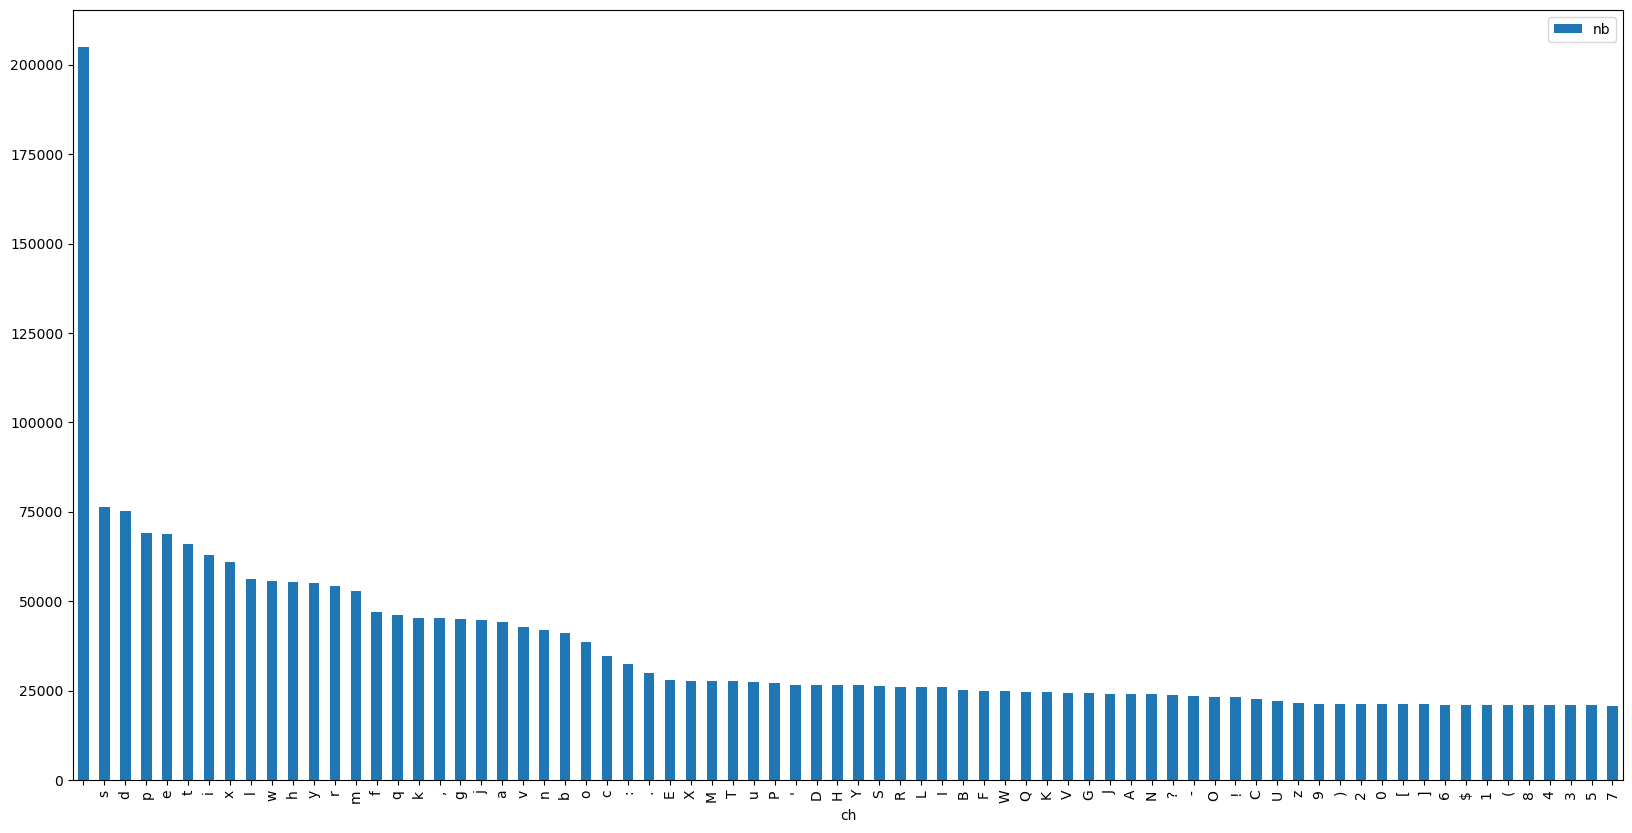

In [69]:
print(df_fullcipher2["nb"].mean(), df_fullcipher2["nb"].median())
df_fullcipher2.plot(x="ch", y=["nb"], kind="bar");

In [71]:
fullcipher3 = " ".join((test3["ciphertext"].values))
dict_fullcipher3 = Counter(fullcipher3.split(" "))
df_fullcipher3 = pd.DataFrame.from_dict(dict_fullcipher3, orient='index')
df_fullcipher3 = df_fullcipher3.reset_index()
df_fullcipher3.columns = ["num", "nb"]
df_fullcipher3.sort_values("nb", ascending=False, inplace=True)
print(df_fullcipher3.shape)
df_fullcipher3.head()

(48901, 2)


,num,nb
52,527,21717
116,540,21562
46,42985,14268
150,44280,14222
221,48113,10728


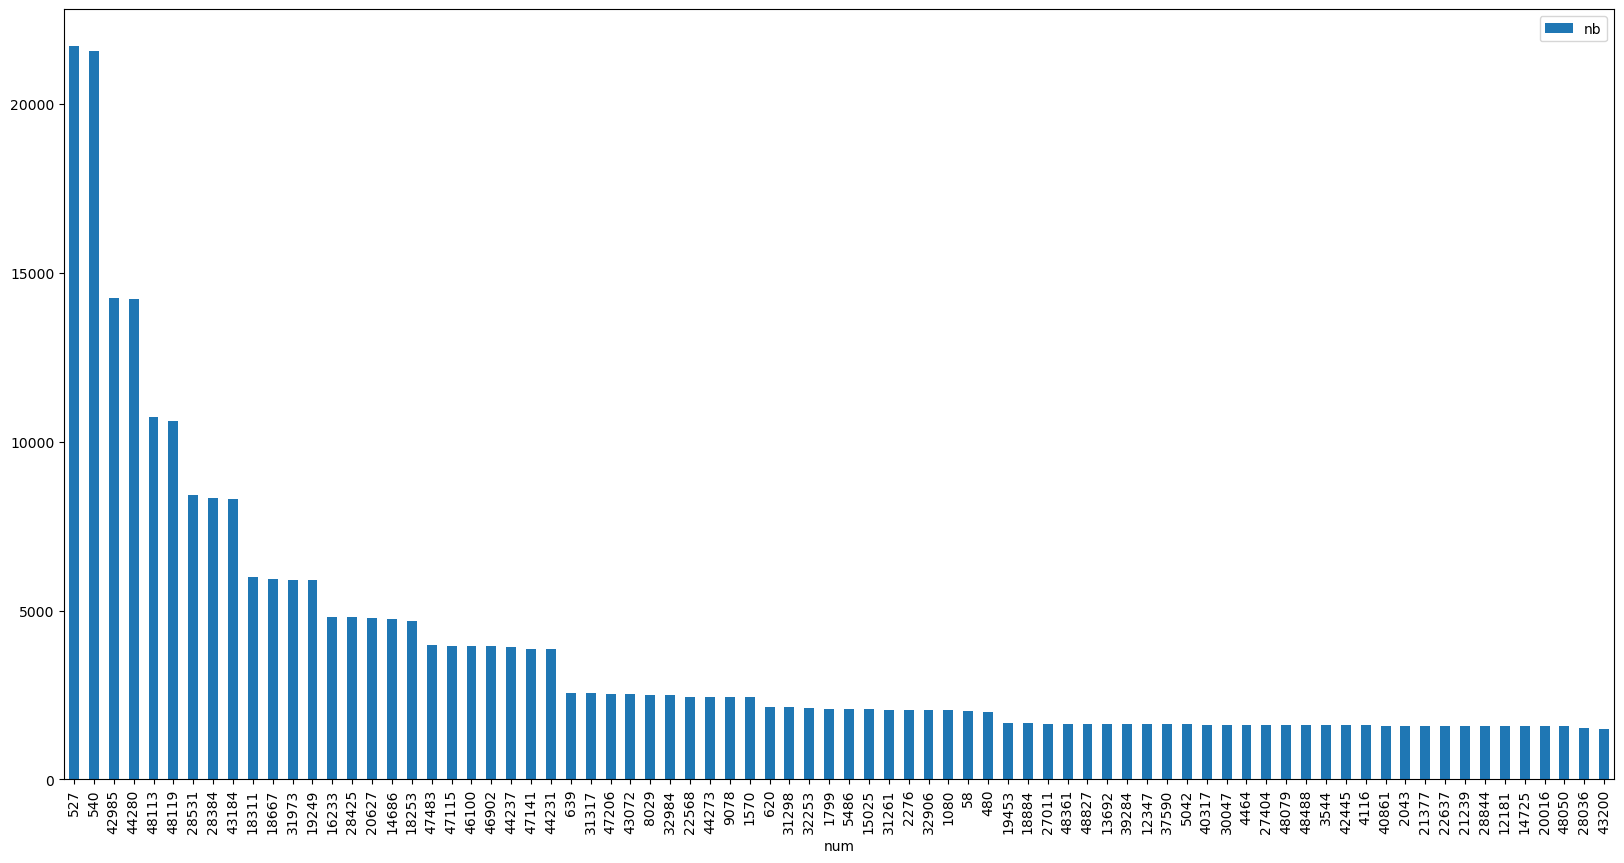

In [73]:
df_fullcipher3[df_fullcipher3["nb"] > 1500].plot(x="num", y=["nb"], kind="bar");